# Predykcja cen nieruchomości - projekt

## Wczytanie danych

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df = pd.read_csv("data/houseprice.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Feature engineering
- dodaj kolumnę zawierającą informację o tym ile lat ma dom w momencie sprzedaży
- policz stosunek powierzchni działki do powierzchni użytkowej

In [3]:
df.insert(len(df.columns) - 1, "Age", df["YrSold"] - df["YearBuilt"])
df.insert(len(df.columns) - 1, "LotToLivArea", df["LotArea"] / df["GrLivArea"])

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age,LotToLivArea,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,5,4.941520,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,31,7.606973,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,7,6.298992,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,91,5.562027,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,8,6.487716,250000


## Czyszczenie danych
### Wartości brakujace
- Sprawdź w jakich kolumnach są brakujące wartości
- Usuń brakujące dane według własnego uznania

In [4]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
df.dropna(axis=1, inplace=True)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age,LotToLivArea,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,5,4.941520,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,31,7.606973,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,7,6.298992,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,91,5.562027,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,8,6.487716,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,8,4.806922,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,32,6.355523,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,69,3.864103,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,60,9.013915,142125


### Niepotrzebne kolumny
- Usuń kolumnę id
- Zlokalizuj zmienne kategoryczne, możemy przyjąć że kolumny kategoryczne to takie, w których liczba unikalnych wartości jest nie większa niż 10. Spośród nich znajdź te, które mają współczynnik gini większy niż 0.6 i wyrzuć je ze zbioru
- Usuń kolumny numeryczne, dla których wartość bezwzględna korelacji z targetem jest mniejsza niż 0.5

**Kolumna Id**

In [6]:
df.drop(columns=["Id"], inplace=True)
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age,LotToLivArea,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,5,4.941520,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,31,7.606973,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,7,6.298992,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,91,5.562027,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,8,6.487716,250000


**Gini index**

In [7]:
def gini(array):
    
    array = np.array(array).flatten()
    
    if np.amin(array) < 0:
        array -= np.amin(array)
        array = array + 0.0000001
    
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

In [8]:
cat_columns = [col for col in df.columns if df[col].nunique() < 11]  # liczba unikalnych wartości w kolumnie
cat_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'PavedDrive',
 'PoolArea',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [9]:
high_gini_cat_columns = [col for col in cat_columns if gini(df[col].value_counts().values) > 0.6]
high_gini_cat_columns

['MSZoning',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'ExterCond',
 'Heating',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Functional',
 'PoolArea',
 'SaleType',
 'SaleCondition']

In [10]:
print(len(high_gini_cat_columns))
print(len(cat_columns))
print(len(df.columns))

20
36
63


In [11]:
df.drop(columns=high_gini_cat_columns, inplace=True)
df

,MSSubClass,LotArea,Street,LotShape,Utilities,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Age,LotToLivArea,SalePrice
0,60,8450,Pave,Reg,AllPub,CollgCr,7,2003,2003,VinylSd,VinylSd,Gd,PConc,706,0,150,856,Ex,Y,856,854,0,1710,1,2,1,Gd,8,0,2,548,Y,0,61,0,0,0,0,2,2008,5,4.941520,208500
1,20,9600,Pave,Reg,AllPub,Veenker,6,1976,1976,MetalSd,MetalSd,TA,CBlock,978,0,284,1262,Ex,Y,1262,0,0,1262,0,2,0,TA,6,1,2,460,Y,298,0,0,0,0,0,5,2007,31,7.606973,181500
2,60,11250,Pave,IR1,AllPub,CollgCr,7,2001,2002,VinylSd,VinylSd,Gd,PConc,486,0,434,920,Ex,Y,920,866,0,1786,1,2,1,Gd,6,1,2,608,Y,0,42,0,0,0,0,9,2008,7,6.298992,223500
3,70,9550,Pave,IR1,AllPub,Crawfor,7,1915,1970,Wd Sdng,Wd Shng,TA,BrkTil,216,0,540,756,Gd,Y,961,756,0,1717,1,1,0,Gd,7,1,3,642,Y,0,35,272,0,0,0,2,2006,91,5.562027,140000
4,60,14260,Pave,IR1,AllPub,NoRidge,8,2000,2000,VinylSd,VinylSd,Gd,PConc,655,0,490,1145,Ex,Y,1145,1053,0,2198,1,2,1,Gd,9,1,3,836,Y,192,84,0,0,0,0,12,2008,8,6.487716,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,Pave,Reg,AllPub,Gilbert,6,1999,2000,VinylSd,VinylSd,TA,PConc,0,0,953,953,Ex,Y,953,694,0,1647,0,2,1,TA,7,1,2,460,Y,0,40,0,0,0,0,8,2007,8,4.806922,175000
1456,20,13175,Pave,Reg,AllPub,NWAmes,6,1978,1988,Plywood,Plywood,TA,CBlock,790,163,589,1542,TA,Y,2073,0,0,2073,1,2,0,TA,7,2,2,500,Y,349,0,0,0,0,0,2,2010,32,6.355523,210000
1457,70,9042,Pave,Reg,AllPub,Crawfor,7,1941,2006,CemntBd,CmentBd,Ex,Stone,275,0,877,1152,Ex,Y,1188,1152,0,2340,0,2,0,Gd,9,2,1,252,Y,0,60,0,0,0,2500,5,2010,69,3.864103,266500
1458,20,9717,Pave,Reg,AllPub,NAmes,5,1950,1996,MetalSd,MetalSd,TA,CBlock,49,1029,0,1078,Gd,Y,1078,0,0,1078,1,1,0,Gd,5,0,1,240,Y,366,0,112,0,0,0,4,2010,60,9.013915,142125


**Korelacja**

In [12]:
np.abs(df.corr(numeric_only=True)["SalePrice"]).sort_values(ascending=False)
# np.abs(df.corr(numeric_only=True))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
Age              0.523350
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
EnclosedPorch    0.128578
ScreenPorch      0.111447
MSSubClass       0.084284
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtFinSF2       0.011378
LotToLivArea     0.010763
Name: SalePrice, dtype: float64

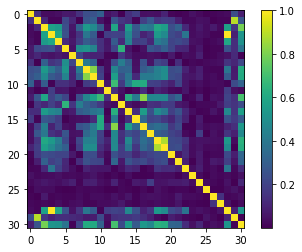

In [13]:
import matplotlib.pyplot as plt

plt.imshow(np.abs(df.corr(numeric_only=True)))
plt.colorbar()

In [14]:
columns_to_drop = (c:= np.abs(df.corr(numeric_only=True)["SalePrice"]).sort_values(ascending=False))[c < 0.5].index

df.drop(columns=columns_to_drop, inplace=True)
df

,Street,LotShape,Utilities,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,Foundation,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,PavedDrive,Age,SalePrice
0,Pave,Reg,AllPub,CollgCr,7,2003,2003,VinylSd,VinylSd,Gd,PConc,856,Ex,Y,856,1710,2,Gd,8,2,548,Y,5,208500
1,Pave,Reg,AllPub,Veenker,6,1976,1976,MetalSd,MetalSd,TA,CBlock,1262,Ex,Y,1262,1262,2,TA,6,2,460,Y,31,181500
2,Pave,IR1,AllPub,CollgCr,7,2001,2002,VinylSd,VinylSd,Gd,PConc,920,Ex,Y,920,1786,2,Gd,6,2,608,Y,7,223500
3,Pave,IR1,AllPub,Crawfor,7,1915,1970,Wd Sdng,Wd Shng,TA,BrkTil,756,Gd,Y,961,1717,1,Gd,7,3,642,Y,91,140000
4,Pave,IR1,AllPub,NoRidge,8,2000,2000,VinylSd,VinylSd,Gd,PConc,1145,Ex,Y,1145,2198,2,Gd,9,3,836,Y,8,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Reg,AllPub,Gilbert,6,1999,2000,VinylSd,VinylSd,TA,PConc,953,Ex,Y,953,1647,2,TA,7,2,460,Y,8,175000
1456,Pave,Reg,AllPub,NWAmes,6,1978,1988,Plywood,Plywood,TA,CBlock,1542,TA,Y,2073,2073,2,TA,7,2,500,Y,32,210000
1457,Pave,Reg,AllPub,Crawfor,7,1941,2006,CemntBd,CmentBd,Ex,Stone,1152,Ex,Y,1188,2340,2,Gd,9,1,252,Y,69,266500
1458,Pave,Reg,AllPub,NAmes,5,1950,1996,MetalSd,MetalSd,TA,CBlock,1078,Gd,Y,1078,1078,1,Gd,5,1,240,Y,60,142125


### Outliery
Usuń wartości odstające korzystając z kryterium opartego o z-score


In [15]:
from scipy.stats import zscore

zscore_df = np.abs(df.select_dtypes([int, float]).apply(zscore))
zscore_df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Age,SalePrice
0,0.651479,1.050994,0.878668,0.459303,0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,1.043259,0.347273
1,0.071836,0.156734,0.429577,0.466465,0.257140,0.482512,0.789741,0.318683,0.311725,0.060731,0.183465,0.007288
2,0.651479,0.984752,0.830215,0.313369,0.627826,0.515013,0.789741,0.318683,0.311725,0.631726,0.977121,0.536154
3,0.651479,1.863632,0.720298,0.687324,0.521734,0.383659,1.026041,0.296763,1.650307,0.790804,1.800676,0.515281
4,1.374795,0.951632,0.733308,0.199680,0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,0.944052,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.071836,0.918511,0.733308,0.238122,0.542435,0.250402,0.789741,0.296763,0.311725,0.060731,0.944052,0.074560
1456,0.071836,0.222975,0.151865,1.104925,2.355701,1.061367,0.789741,0.296763,0.311725,0.126420,0.150396,0.366161
1457,0.651479,1.002492,1.024029,0.215641,0.065656,1.569647,0.789741,1.527656,1.026858,1.033914,1.073157,1.077611
1458,0.795151,0.704406,0.539493,0.046905,0.218982,0.832788,1.026041,0.934130,1.026858,1.090059,0.775536,0.488523


In [16]:
z= zscore_df.apply(lambda x: x < 3)
zsum = z.sum(axis=1)

df = df[zsum == len(z.columns)]
df

,Street,LotShape,Utilities,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,Foundation,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,PavedDrive,Age,SalePrice
0,Pave,Reg,AllPub,CollgCr,7,2003,2003,VinylSd,VinylSd,Gd,PConc,856,Ex,Y,856,1710,2,Gd,8,2,548,Y,5,208500
1,Pave,Reg,AllPub,Veenker,6,1976,1976,MetalSd,MetalSd,TA,CBlock,1262,Ex,Y,1262,1262,2,TA,6,2,460,Y,31,181500
2,Pave,IR1,AllPub,CollgCr,7,2001,2002,VinylSd,VinylSd,Gd,PConc,920,Ex,Y,920,1786,2,Gd,6,2,608,Y,7,223500
3,Pave,IR1,AllPub,Crawfor,7,1915,1970,Wd Sdng,Wd Shng,TA,BrkTil,756,Gd,Y,961,1717,1,Gd,7,3,642,Y,91,140000
4,Pave,IR1,AllPub,NoRidge,8,2000,2000,VinylSd,VinylSd,Gd,PConc,1145,Ex,Y,1145,2198,2,Gd,9,3,836,Y,8,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Reg,AllPub,Gilbert,6,1999,2000,VinylSd,VinylSd,TA,PConc,953,Ex,Y,953,1647,2,TA,7,2,460,Y,8,175000
1456,Pave,Reg,AllPub,NWAmes,6,1978,1988,Plywood,Plywood,TA,CBlock,1542,TA,Y,2073,2073,2,TA,7,2,500,Y,32,210000
1457,Pave,Reg,AllPub,Crawfor,7,1941,2006,CemntBd,CmentBd,Ex,Stone,1152,Ex,Y,1188,2340,2,Gd,9,1,252,Y,69,266500
1458,Pave,Reg,AllPub,NAmes,5,1950,1996,MetalSd,MetalSd,TA,CBlock,1078,Gd,Y,1078,1078,1,Gd,5,1,240,Y,60,142125


## One hot encoding

In [17]:
text_columns = df.select_dtypes("object").columns
text_columns

Index(['Street', 'LotShape', 'Utilities', 'Neighborhood', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'Foundation', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'PavedDrive'],
      dtype='object')

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, dtype=int)
encoder.fit_transform(df.select_dtypes("object"))

encoder.get_feature_names_out()
# encoder.get_feature_names_out().size

array(['Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Exterior1st_AsbShng',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st

In [19]:
ohe_df = pd.DataFrame(encoder.fit_transform(df.select_dtypes("object")), columns=encoder.get_feature_names_out())
ohe_df

,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_AllPub,Utilities_NoSeWa,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
2,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
4,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
1402,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
1403,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1404,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [20]:
df = pd.concat([ohe_df.reset_index(drop=True), df.drop(columns=text_columns).reset_index(drop=True)], axis=1)
df

,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_AllPub,Utilities_NoSeWa,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Age,SalePrice
0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,7,2003,2003,856,856,1710,2,8,2,548,5,208500
1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,6,1976,1976,1262,1262,1262,2,6,2,460,31,181500
2,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,7,2001,2002,920,920,1786,2,6,2,608,7,223500
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,7,1915,1970,756,961,1717,1,7,3,642,91,140000
4,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,8,2000,2000,1145,1145,2198,2,9,3,836,8,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,6,1999,2000,953,953,1647,2,7,2,460,8,175000
1402,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,6,1978,1988,1542,2073,2073,2,7,2,500,32,210000
1403,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,7,1941,2006,1152,1188,2340,2,9,1,252,69,266500
1404,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

## Feature selection

Wykonaj forward oraz backward selection szukając 20 najlepszych cech. Następnie znajdź część wspólną, która będzie wykorzystana w dalszej części.

In [21]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()

sfs1 = SequentialFeatureSelector(model, direction='forward', scoring='r2', n_features_to_select=20)
sfs1.fit(df.drop(columns=["SalePrice"]), df["SalePrice"])

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=20,
                          scoring='r2')

In [22]:
sfs2 = SequentialFeatureSelector(model, direction='backward', scoring='r2', n_features_to_select=20)
sfs2.fit(df.drop(columns=["SalePrice"]), df["SalePrice"])

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=20, scoring='r2')

In [66]:
print(f'Common featues: {(sfs1.get_support() & sfs2.get_support()).sum()}')

common = np.intersect1d(sfs1.get_feature_names_out().flatten(), sfs2.get_feature_names_out())
common

Common featues: 9


array(['ExterQual_Ex', 'Exterior1st_BrkFace', 'GarageArea', 'GrLivArea',
       'KitchenQual_Ex', 'Neighborhood_BrDale', 'OverallQual',
       'TotalBsmtSF', 'YearRemodAdd'], dtype=object)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()

sfs1 = SequentialFeatureSelector(model, direction='forward', scoring='r2', n_features_to_select=20)
sfs1.fit(df.drop(columns=["SalePrice"]), df["SalePrice"])

sfs2 = SequentialFeatureSelector(model, direction='backward', scoring='r2', n_features_to_select=20)
sfs2.fit(df.drop(columns=["SalePrice"]), df["SalePrice"])

print(f'Common featues: {(sfs1.get_support() & sfs2.get_support()).sum()}')

common = np.intersect1d(sfs1.get_feature_names_out().flatten(), sfs2.get_feature_names_out())
common

## Trenowanie modelu

**Wytrenuj kilka modeli:**

- Regresja liniowa
- Regresja liniowa z cross walidacją
- Regresja Ridge
- Regresja LASSO
- Regresja ElasticNet

**Dla każdego wyznacz następujące metryki:**

- `mean_absolute_error`
- `mean_absolute_percentage_error`
- `root_mean_squared_error`
- `r2_score`

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def calculate_metrics(y_test, y_pred):

    return pd.DataFrame({'MAE': mean_absolute_error(y_test, y_pred),
                         'MSE': mean_squared_error(y_test, y_pred),
                         'MAPE': mean_absolute_percentage_error(y_test, y_pred),
                         'R2': r2_score(y_test, y_pred)},
                       index=['metric_value'])

In [68]:
from sklearn.model_selection import train_test_split

# X, y = df.drop(columns=["SalePrice"]), df["SalePrice"]
X, y = df[common], df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Regresja liniowa

In [71]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

calculate_metrics(y_test, y_pred)

,MAE,MSE,MAPE,R2
metric_value,19733.054289,7.943121e+08,0.127727,0.827797


### Regresja liniowa z cross walidacją

In [72]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
print(f'MAE: {scores.mean()}')

MAE: 19313.099155827083


In [73]:
from sklearn.model_selection import KFold

model = LinearRegression()

cv = KFold(n_splits=10, shuffle=True)

y_test_all = []
y_pred_all = []
scores = []

for train_idx, test_idx in cv.split(X):
    
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred = model.predict(X.iloc[test_idx])
    
    y_test_all.extend(y.iloc[test_idx])
    y_pred_all.extend(y_pred)
    
    score = mean_absolute_error(y.iloc[test_idx], y_pred)
    scores.append(score)
    
print(f'MAE: {np.mean(scores)}')

MAE: 19236.089971421632


### Regresja Ridge

In [74]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

calculate_metrics(y_test, y_pred)

,MAE,MSE,MAPE,R2
metric_value,19790.156744,7.931097e+08,0.128139,0.828058


### Regresja Lasso

In [75]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=50, max_iter=10_000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

calculate_metrics(y_test, y_pred)

,MAE,MSE,MAPE,R2
metric_value,19745.637432,7.934458e+08,0.127802,0.827985


### Regresja ElasticNet

In [76]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.01, l1_ratio=0.6, max_iter=10_000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

calculate_metrics(y_test, y_pred)

,MAE,MSE,MAPE,R2
metric_value,19766.521285,7.929997e+08,0.127973,0.828081


## Pipeline

Wytrenuj model ElasticNet korzystając z `Pipeline` oraz grid searcha

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", MinMaxScaler()), ("regressor", ElasticNet(max_iter=10_000))])

params = {"regressor__alpha": [1e-4, 1e-3, 1e-2, 1e-1], "regressor__l1_ratio": [0.4, 0.6, 0.8, 1]}

gs = GridSearchCV(pipe, param_grid=params, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('regressor',
                                        ElasticNet(max_iter=10000))]),
             param_grid={'regressor__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'regressor__l1_ratio': [0.4, 0.6, 0.8, 1]})

In [80]:
print(gs.best_params_)

y_pred = gs.predict(X_test)
calculate_metrics(y_test, y_pred)

{'regressor__alpha': 0.001, 'regressor__l1_ratio': 0.4}


,MAE,MSE,MAPE,R2
metric_value,19702.149806,7.960519e+08,0.12733,0.82742
